In [ ]:
#importing training dataset
import pandas as pd

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
df=pd.concat([train,test])
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0


In [ ]:
train.shape

(7613, 5)

In [141]:
test.shape

(3263, 4)

In [ ]:
df["text"]

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm in RI worse than last hurricane. My city...
3260    Green Line derailment in Chicago http://t.co/U...
3261    MEG issues Hazardous Weather Outlook (HWO) htt...
3262    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 10876, dtype: object

In [ ]:
#exploring the columns and rows of dataset
print(f"shape {df.shape}")
print(f"columns -> {df.columns}")

shape (10876, 5)
columns -> Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')


In [ ]:
#check how many null values are there in each column
for column in df.columns:
    print(column,df[column].isnull().sum())


id 0
keyword 87
location 3638
text 0
target 3263


In [ ]:
#Prepare the features
X=df.drop("target",axis=1)

#Prepare the targets
Y=df["target"]

#explore features and labels
print(f"X {X.shape}")
print(f"Y {Y.shape}")


X (10876, 4)
Y (10876,)


In [ ]:
#import libraries
from keras.layers import Embedding,LSTM,Dense
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import one_hot


In [ ]:
features=X.copy()

In [ ]:
features.reset_index(inplace=True)

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(features)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', features['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923
5924
5925
5926
5927
5928
5929
5930
5931
5932
5933
5934
5935
5936
5937
5938
5939
5940
5941
5942
5943
5944
5945
5946
5947
5948
5949
5950
5951
5952
5953
5954
5955
5956
5957
5958
5959
5960
5961
5962
5963
5964
5965
5966
5967
5968
5969
5970
5971
5972
5973
5974
5975
5976
5977
5978
5979
5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065

In [ ]:
corpus

['deed reason earthquak may allah forgiv us',
 'forest fire near la rong sask canada',
 'resid ask shelter place notifi offic evacu shelter place order expect',
 'peopl receiv wildfir evacu order california',
 'got sent photo rubi alaska smoke wildfir pour school',
 'rockyfir updat california hwi close direct due lake counti fire cafir wildfir',
 'flood disast heavi rain caus flash flood street manit colorado spring area',
 'top hill see fire wood',
 'emerg evacu happen build across street',
 'afraid tornado come area',
 'three peopl die heat wave far',
 'haha south tampa get flood hah wait second live south tampa gonna gonna fvck flood',
 'rain flood florida tampabay tampa day lost count',
 'flood bago myanmar arriv bago',
 'damag school bu multi car crash break',
 'man',
 'love fruit',
 'summer love',
 'car fast',
 'goooooooaaaaaal',
 'ridicul',
 'london cool',
 'love ski',
 'wonder day',
 'looooool',
 'way eat shit',
 'nyc last week',
 'love girlfriend',
 'cooool',
 'like pasta',
 '

In [ ]:
### Vocabulary size
voc_size=5000

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[4111, 2290, 2295, 87, 4403, 4721, 4177],
 [3626, 3564, 1420, 4013, 2726, 4654, 3297],
 [4055, 3727, 4653, 3629, 4760, 925, 1471, 4653, 3629, 3094, 3040],
 [1960, 114, 1208, 1471, 3094, 1156],
 [1840, 3109, 4764, 447, 3773, 2171, 1208, 4443, 1470],
 [4579, 2201, 1156, 3415, 278, 520, 4798, 4455, 584, 3564, 3633, 1208],
 [435, 3565, 1957, 4103, 653, 24, 435, 3192, 4119, 684, 618, 2654],
 [3280, 744, 3119, 3564, 289],
 [4374, 1471, 4880, 4109, 9, 3192],
 [2717, 2015, 1793, 2654],
 [1598, 1960, 636, 1218, 634, 3613],
 [4644,
  4125,
  3247,
  481,
  435,
  4633,
  2603,
  4918,
  3814,
  4125,
  3247,
  2031,
  2031,
  4229,
  435],
 [4103, 435, 2340, 3638, 3247, 4507, 4454, 2253],
 [435, 4598, 1394, 3244, 4598],
 [4230, 1470, 3603, 797, 2228, 1165, 1079],
 [3587],
 [3292, 4671],
 [4512, 3292],
 [2228, 178],
 [4621],
 [4314],
 [3402, 3936],
 [3292, 1563],
 [4176, 4507],
 [3725],
 [2035, 4448, 4977],
 [895, 4550, 779],
 [3292, 3406],
 [3091],
 [3215, 411],
 [2142],
 [479, 1541, 3880, 1655

### Embedding Representation

In [ ]:
#find maximum words in a sentence to determine the sentence_length
max_words_per_text=df["text"].str.split().map(lambda x: len(x)).max()
print(max_words_per_text)

31


In [ ]:
sent_length=max_words_per_text
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 4403 4721 4177]
 [   0    0    0 ... 2726 4654 3297]
 [   0    0    0 ... 3629 3094 3040]
 ...
 [   0    0    0 ... 3932 4822 1622]
 [   0    0    0 ... 4822 4500 4678]
 [   0    0    0 ... 4374 3792 1808]]


In [ ]:
## Creating model

embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 31, 40)            200000    
                                                                 
 lstm_5 (LSTM)               (None, 100)               56400     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
len(embedded_docs),Y.shape

(10876, (10876,))

In [ ]:
import numpy as np
X_final=np.array(embedded_docs[:train.shape[0]])
Y_final=np.array(Y[:train.shape[0]])

X_final_test=np.array(embedded_docs[train.shape[0]:])

In [ ]:
X_final.shape,Y_final.shape

((7613, 31), (7613,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.33, random_state=42)

### Model Training

In [ ]:
### Finally Training
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
80/80 [==============================] - 2s 13ms/step - loss: 0.6271 - accuracy: 0.6520 - val_loss: 0.5258 - val_accuracy: 0.7636
Epoch 2/10
80/80 [==============================] - 1s 8ms/step - loss: 0.4165 - accuracy: 0.8194 - val_loss: 0.4714 - val_accuracy: 0.7827
Epoch 3/10
80/80 [==============================] - 1s 7ms/step - loss: 0.2834 - accuracy: 0.8849 - val_loss: 0.5458 - val_accuracy: 0.7748
Epoch 4/10
80/80 [==============================] - 1s 8ms/step - loss: 0.2064 - accuracy: 0.9198 - val_loss: 0.6322 - val_accuracy: 0.7525
Epoch 5/10
80/80 [==============================] - 1s 7ms/step - loss: 0.1493 - accuracy: 0.9471 - val_loss: 0.7501 - val_accuracy: 0.7382
Epoch 6/10
80/80 [==============================] - 1s 7ms/step - loss: 0.1144 - accuracy: 0.9622 - val_loss: 1.0197 - val_accuracy: 0.7366
Epoch 7/10
80/80 [==============================] - 1s 7ms/step - loss: 0.0754 - accuracy: 0.9749 - val_loss: 0.9890 - val_accuracy: 0.7270
Epoch 8/10
80/80 [=

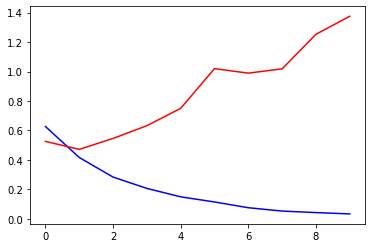

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history["loss"],"b")
plt.plot(history.history["val_loss"],"r")

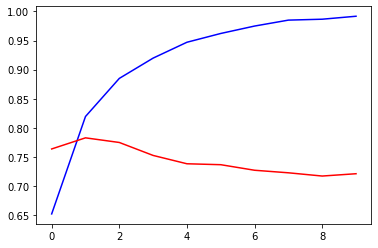

In [ ]:
plt.plot(history.history['accuracy'],"b")
plt.plot(history.history['val_accuracy'],"r")

### Adding Dropout 

In [ ]:
from keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
### Finally Training
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
80/80 [==============================] - 2s 12ms/step - loss: 0.6311 - accuracy: 0.6384 - val_loss: 0.5500 - val_accuracy: 0.7421
Epoch 2/10
80/80 [==============================] - 1s 7ms/step - loss: 0.4214 - accuracy: 0.8125 - val_loss: 0.4676 - val_accuracy: 0.7887
Epoch 3/10
80/80 [==============================] - 1s 8ms/step - loss: 0.3089 - accuracy: 0.8704 - val_loss: 0.5068 - val_accuracy: 0.7803
Epoch 4/10
80/80 [==============================] - 1s 7ms/step - loss: 0.2423 - accuracy: 0.9041 - val_loss: 0.5706 - val_accuracy: 0.7553
Epoch 5/10
80/80 [==============================] - 1s 7ms/step - loss: 0.1972 - accuracy: 0.9255 - val_loss: 0.6959 - val_accuracy: 0.7298
Epoch 6/10
80/80 [==============================] - 1s 8ms/step - loss: 0.1635 - accuracy: 0.9396 - val_loss: 0.7969 - val_accuracy: 0.7374
Epoch 7/10
80/80 [==============================] - 1s 7ms/step - loss: 0.1353 - accuracy: 0.9490 - val_loss: 0.8984 - val_accuracy: 0.7370
Epoch 8/10
80/80 [=

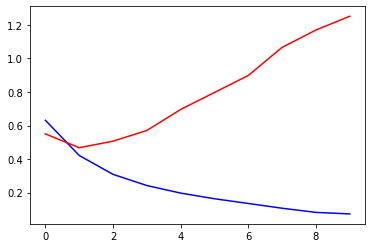

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history["loss"],"b")
plt.plot(history.history["val_loss"],"r")

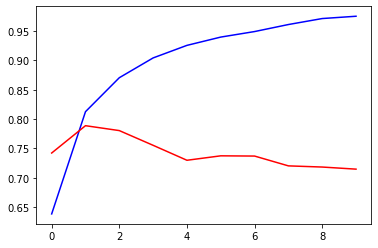

In [ ]:
plt.plot(history.history['accuracy'],"b")
plt.plot(history.history['val_accuracy'],"r")

### Creating submission


In [ ]:
prediction=model.predict(X_final_test)

In [139]:
threshold=0.5
labels=np.where(prediction > threshold, 1,0)


In [145]:
labels=labels.reshape(3263)

In [146]:
sample=pd.read_csv("sample_submission.csv")
sub=pd.DataFrame({'id':sample['id'].values.tolist(),'target':labels})
sub.to_csv('submission.csv',index=False)
